In [2]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [3]:
using Revise
using Newtrinos
using Newtrinos.osc

In [150]:

#STANDARD MODEL

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

p = Newtrinos.get_params(experiments_SM)

[ Info: Loading Katrin data


(m₀ = 0.1, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [151]:

all_priors = Newtrinos.get_priors(experiments_SM)


vars_to_scan = (m₀=31, Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = p.δCP,
    θ₁₂ = p.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ =p.θ₂₃
)
    


(m₀ = Distributions.Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Distributions.Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Distributions.Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [152]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], δCP = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], θ₁₂ = [0.587252368744322

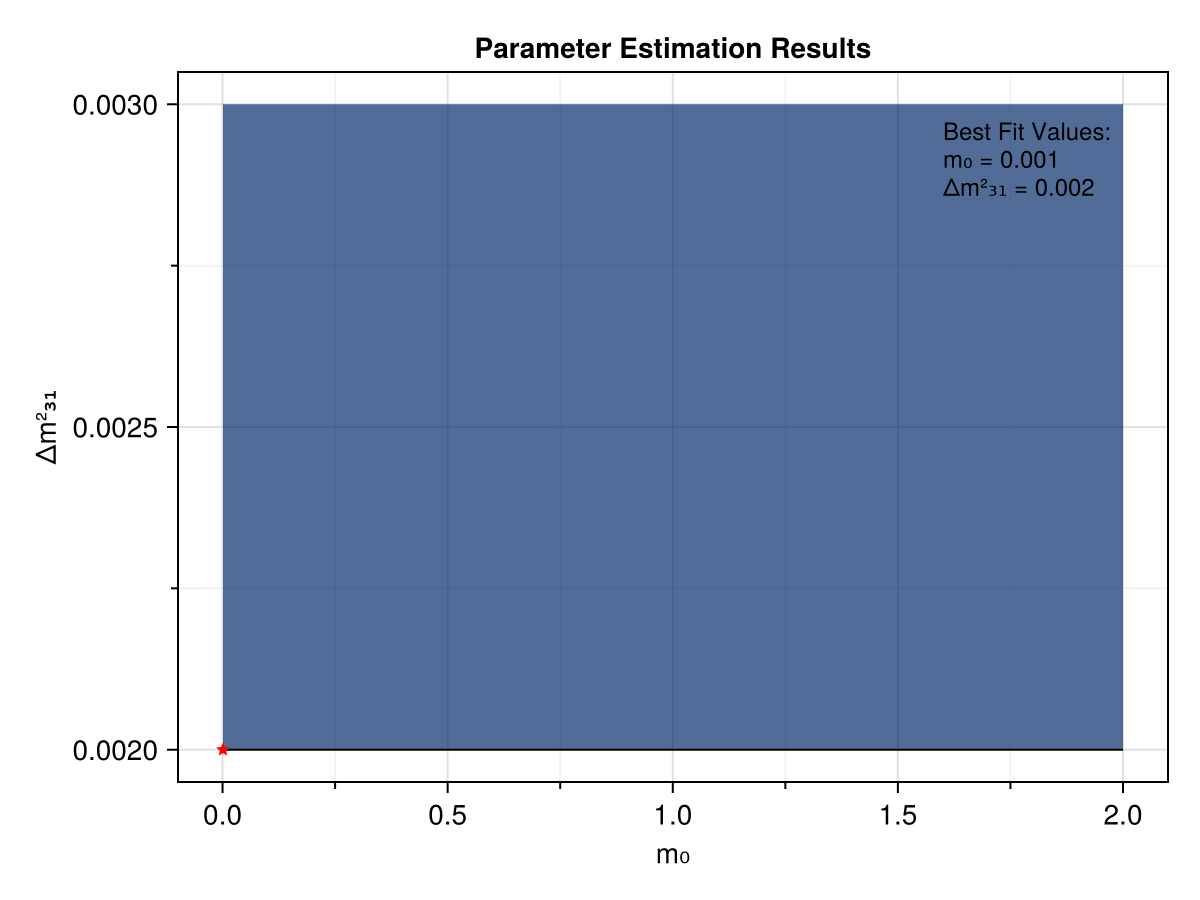

In [153]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_SM.png", img)

In [ ]:
println(result.values.log_posterior)

Any[-0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536; -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198

rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


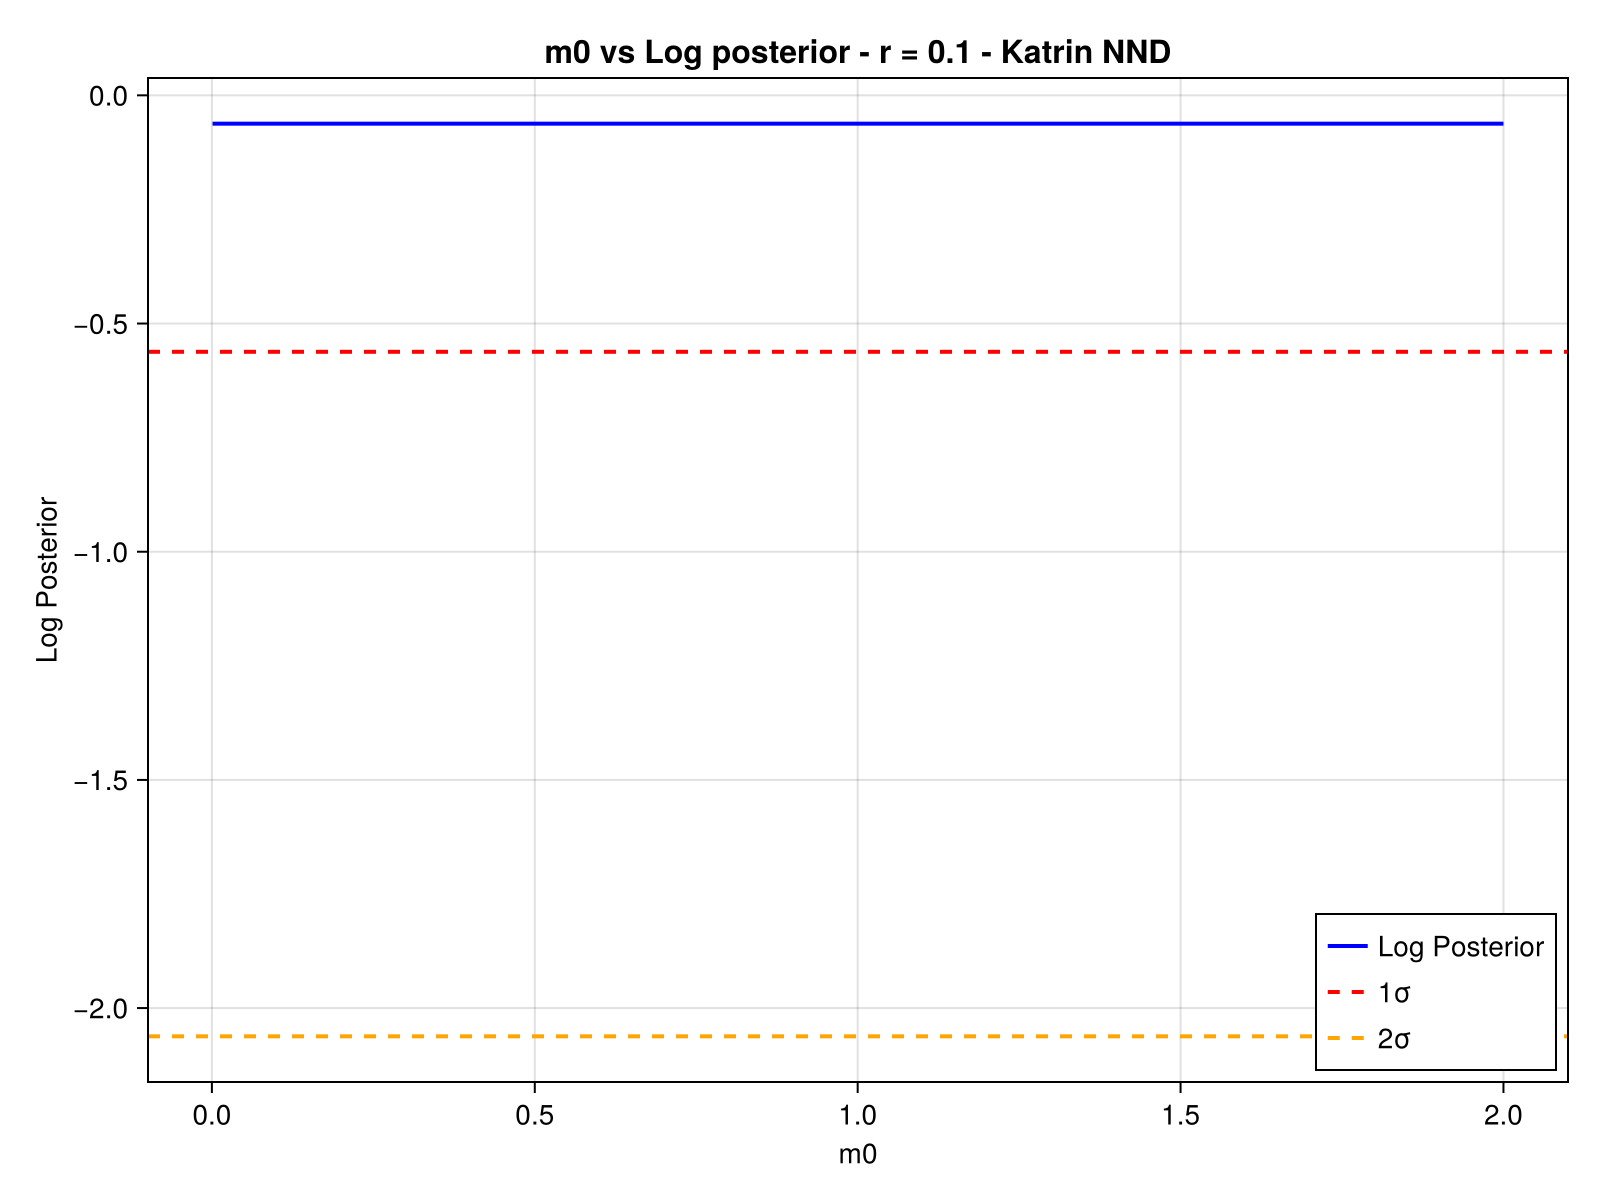

In [ ]:
#MODIFYYYY 

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


In [164]:
using Revise
using Newtrinos
using Newtrinos.osc

In [222]:
#NNATURALNESS 
using Revise
using Newtrinos
using Newtrinos.osc


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

[ Info: Loading Katrin data


(ComplexF64[-0.8226499302198954 - 0.0im -0.5475422492031515 - 0.0im … -0.018247880044801542 - 0.0im -0.00260614366116318 + 0.004058828269455944im; 0.41202609811589785 + 0.07654378608826068im -0.5124904035680069 + 0.05094628378086447im … -0.017079711057970164 + 0.0016978811708404005im -0.024864553075695087 - 0.0im; … ; -0.0017559951470744277 - 0.00032621845442392544im 0.002184159366852766 - 0.00021712563230766573im … -0.13147376777822656 + 0.013069707913233494im -0.19139881616778553 - 0.0im; 0.0015986538832099258 - 0.00028333832731273546im -0.0027963106643073736 - 0.0001885853256935242im … 0.16832173718379992 + 0.011351746439793092im -0.16624019790169403 - 0.0im], [0.0, 7.53e-5, -0.0024, 0.10591446239191524, 0.10663293650627906, 0.08301488902573811, 0.3152117615798212, 0.3172012104223181, 0.2518030335321139, 0.6282110594387473  …  29.38466003049342, 39.30188296860775, 39.54062212244132, 31.692666910167546, 42.32512380614301, 42.58222183377225, 34.13076435979275, 9.06640133968601e6, 9.12

In [223]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( r=31,  m₀=31)  

modified_priors = (
    N = all_priors.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(N = Distributions.Uniform{Float64}(a=3.0, b=100.0), m₀ = Distributions.Uniform{Float64}(a=0.001, b=2.0), r = Distributions.Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Distributions.Uniform{Float64}(a=-0.003, b=-0.002), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Distributions.Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [224]:
matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)


(ComplexF64[-0.8226499302198954 - 0.0im -0.5475422492031515 - 0.0im … -0.018247880044801542 - 0.0im -0.00260614366116318 + 0.004058828269455944im; 0.41202609811589785 + 0.07654378608826068im -0.5124904035680069 + 0.05094628378086447im … -0.017079711057970164 + 0.0016978811708404005im -0.024864553075695087 - 0.0im; … ; -0.0017559951470744277 - 0.00032621845442392544im 0.002184159366852766 - 0.00021712563230766573im … -0.13147376777822656 + 0.013069707913233494im -0.19139881616778553 - 0.0im; 0.0015986538832099258 - 0.00028333832731273546im -0.0027963106643073736 - 0.0001885853256935242im … 0.16832173718379992 + 0.011351746439793092im -0.16624019790169403 - 0.0im], [0.0, 7.53e-5, -0.0024, 0.10591446239191524, 0.10663293650627906, 0.08301488902573811, 0.3152117615798212, 0.3172012104223181, 0.2518030335321139, 0.6282110594387473  …  29.38466003049342, 39.30188296860775, 39.54062212244132, 31.692666910167546, 42.32512380614301, 42.58222183377225, 34.13076435979275, 9.06640133968601e6, 9.12

In [225]:
par

(N = 30.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = -0.0024, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [226]:
nu_mass=Newtrinos.katrin.get_neutrinomass(osc_cfg.flavour)(par)

0.03812948139197299

In [227]:
likelihood_NN = Newtrinos.generate_likelihood(experiments);

result_NN = Newtrinos.scan(likelihood_NN, modified_priors, vars_to_scan, par)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


NewtrinosResult((r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0], m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0]), (N = [30.0 30.0 … 30.0 30.0; 30.0 30.0 … 30.0 30.0; … ; 30.0 30.0 … 30.0 30.0; 30.0 30.0 … 30.0 30.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], Δm²₃₁ = [-0.0024 -0.0024 … -0.0024 -0.0024; -0.0024 -0.0024 … -0.0024 -0.0024; … ; -0.0

In [228]:
using Revise
using Newtrinos

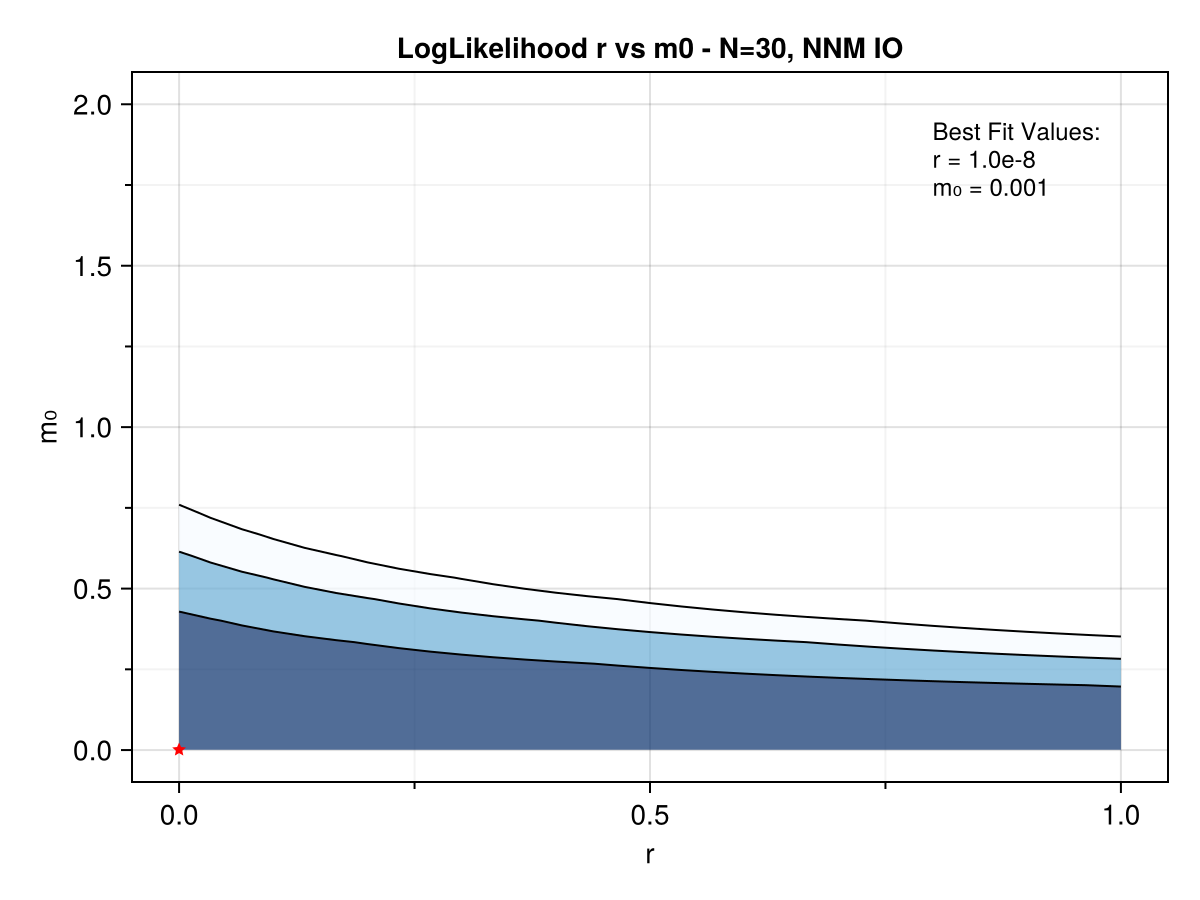

In [229]:
#plot and save the image
using CairoMakie
img = CairoMakie.plot(result_NN; title="LogLikelihood r vs m0 - N=30, NNM IO")
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/aug_plots/katrin/katrin_rm0_N30_NNM_IO.png", img)

rindex: 31


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


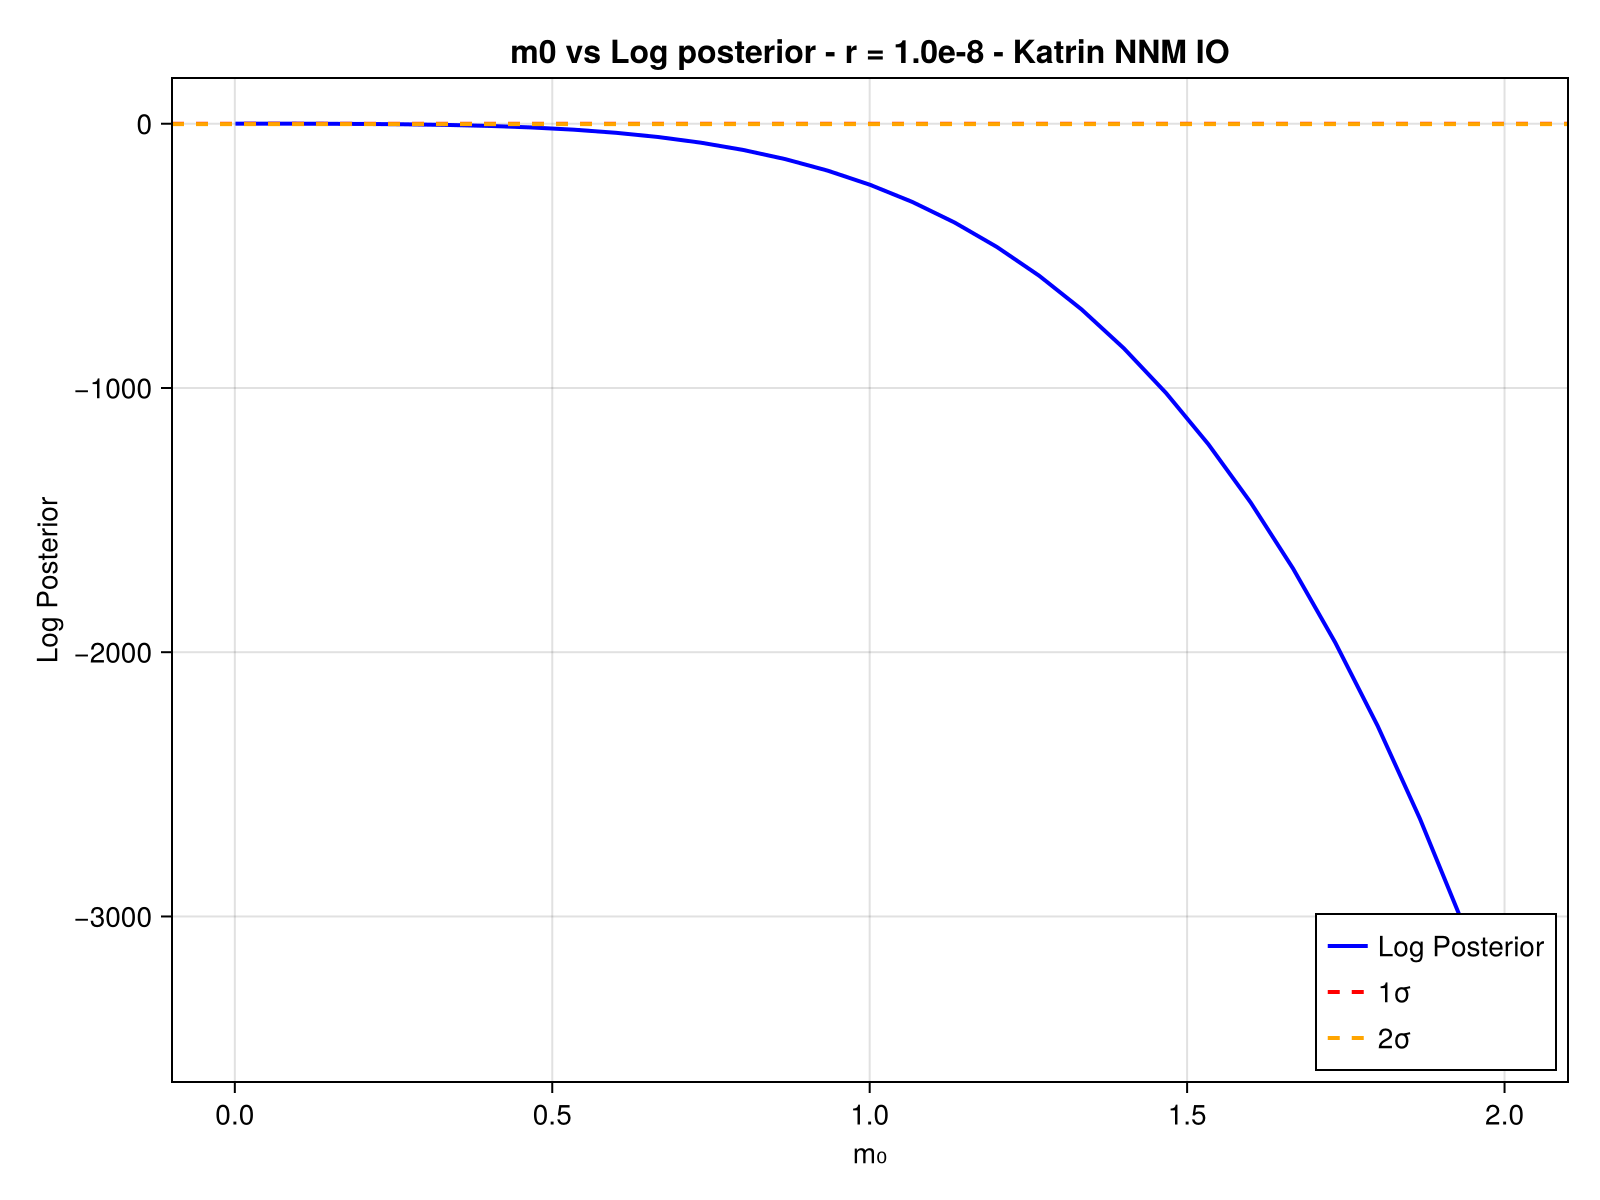

In [233]:
#plot the logposterior value vs r
result = result_NN

#value of r fixed
rfixed =  0.00000001
rmax=1
rindex = 31 #round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel =  String(keys(result.axes)[2]),
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NNM IO",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/aug_plots/katrin/katrin_m0Logpost_NNM_IO_N=30_r=$rfixed.png", fig)


m0index: 5


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


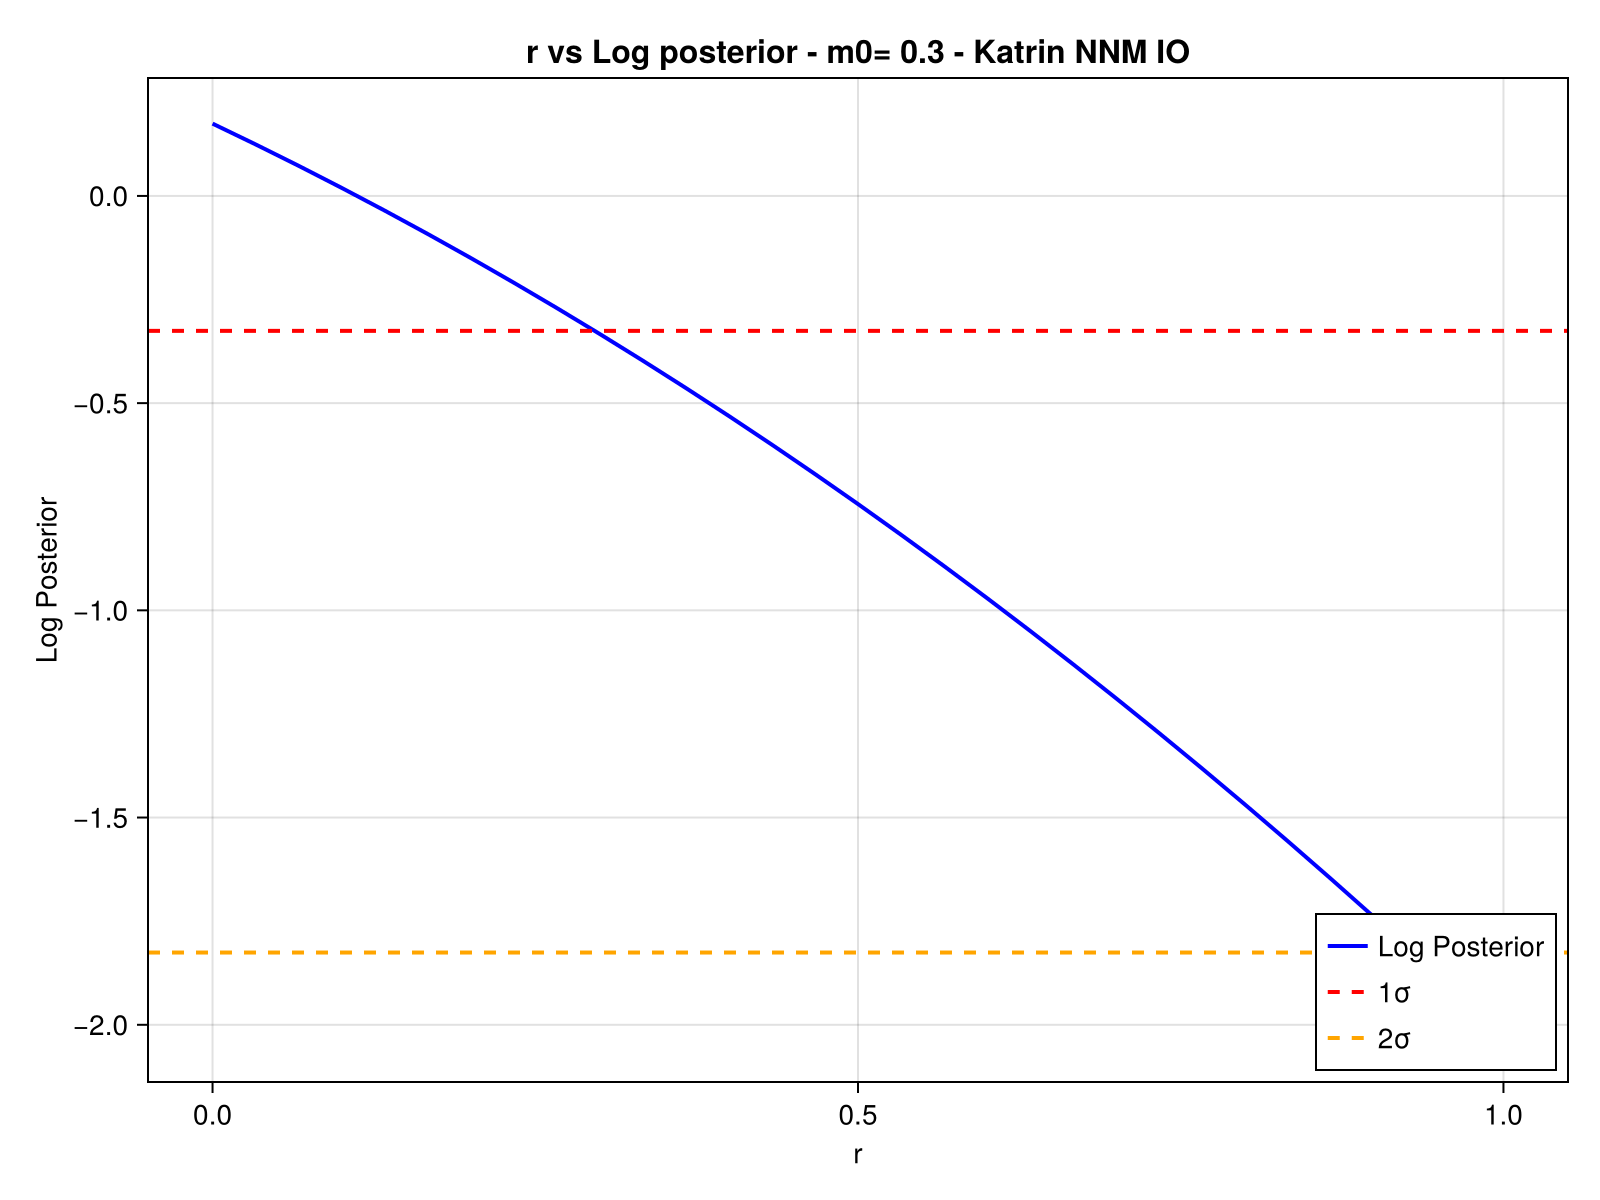

In [231]:

#value of m0 fixed
m0fixed =0.3
m0max=2
m0index = round(Int, 31/m0max* m0fixed)
println("m0index: ", m0index)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, m0index ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, m0index ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel =  String(keys(result.axes)[1]),
    ylabel = "Log Posterior",
    title = "r vs Log posterior - m0= $m0fixed - Katrin NNM IO",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, m0index],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/aug_plots/katrin/katrin_rLogpost_NNM_IO_N=30_m0=$m0fixed.png", fig)
